In [1]:
import os
import sys
sys.path.insert(0, "../")
import pandas as pd
import numpy as np
import data_processing.utils as utils
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

### Methodology

In [2]:
TEST_PATH = os.path.join(os.path.dirname(os.getcwd()), 'data_processing/test_files/')
SAMPLE_BY_LOAN_FN = "sample_by_loan_amt.csv"
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 160)

In [47]:
cat_vars_of_interest = ["term", "grade", "sub_grade", "emp_title", "emp_length", "home_ownership", "verification_status", "purpose", "addr_state", 
    "initial_list_status", "application_type", "hardship_flag", "loan_status"
]
num_vars_of_interest = list(set([
    "loan_amnt", "funded_amnt", "funded_amnt_inv", "int_rate", "installment", "issue_d", "annual_inc", "dti", "fico_range_low", "fico_range_high", 
    "revol_bal", "revol_util", "open_acc", "delinq_2yrs", "inq_last_6mths", "total_acc", "mths_since_last_delinq", "mths_since_last_record", "mths_since_rcnt_il",
    "last_credit_pull_d", "open_il_12m", "open_il_24m", "total_bal_il", "il_util", "open_rv_12m", "open_rv_24m", "max_bal_bc", "all_util",
    "total_rev_hi_lim", "inq_fi", "total_cu_tl", "inq_last_12m", "acc_open_past_24mths", "avg_cur_bal", "bc_open_to_buy", "bc_util", "num_accts_ever_120_pd",
    "num_actv_bc_tl", "num_actv_rev_tl", "num_bc_sats", "num_bc_tl", "num_sats", "num_il_tl", "num_op_rev_tl", "num_rev_accts", "num_rev_tl_bal_gt_0", "tot_hi_cred_lim", 
    "pct_tl_nvr_dlq", "percent_bc_gt_75", "total_bal_ex_mort", "total_bc_limit","total_il_high_credit_limit", "mths_since_last_major_derog", "mths_since_recent_bc",
    "mths_since_recent_bc_dlq", "mths_since_recent_inq", "mths_since_recent_revol_delinq"
]))

/home/acowlagi/.conda/envs/torch_py39/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (19,59,118) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


grade
sub_grade
home_ownership
verification_status
purpose
loan_status
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


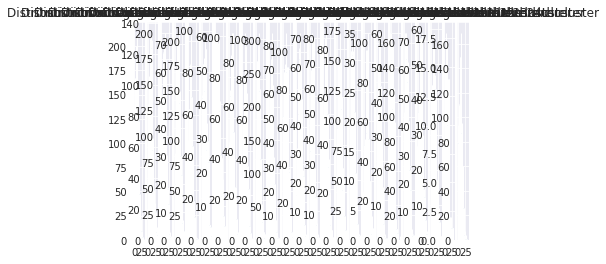

Created dataset at: /home/acowlagi/datathon/citadel-summer-invitational22/data_processing/test_files/testClustering.csv with a proximity score of 20571.288260683614 between columns: loan_amnt and fico_range_high at a k-value of:25


In [107]:
clean_df = utils.cluster_create(["loan_amnt", "fico_range_high"], TEST_PATH + "sample_by_loan_amt.csv", TEST_PATH + "testClustering.csv")

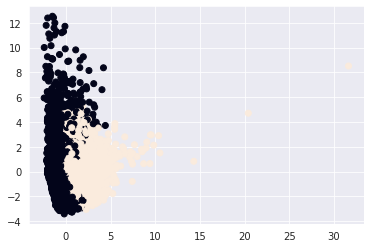

In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering

X = clean_df[["loan_amnt","annual_inc", "fico_range_high", "delinq_2yrs", "term"]]
scaler = StandardScaler()
scaled_dimensions = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_new = pca.fit_transform(scaled_dimensions)

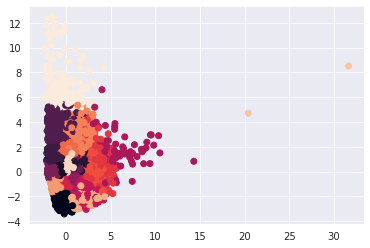

In [109]:
clustering = KMeans(n_clusters=20).fit(X_new)
clean_df["cluster"] = clustering.labels_
plt.scatter(X_new[:, 0], X_new[:, 1], c=clustering.labels_.astype(float))

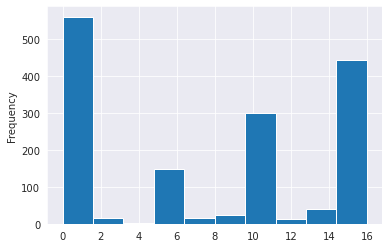

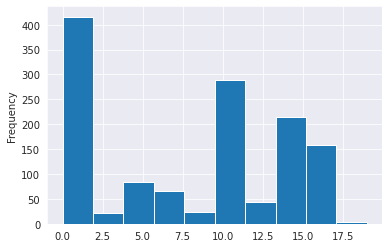

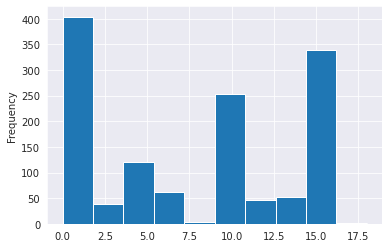

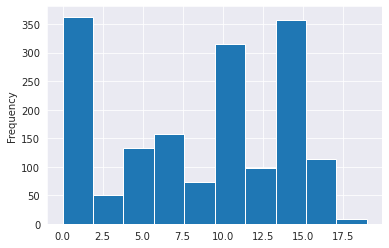

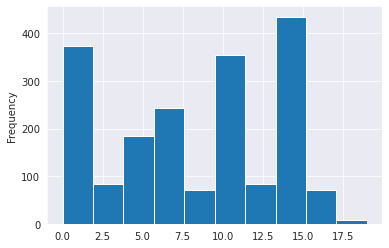

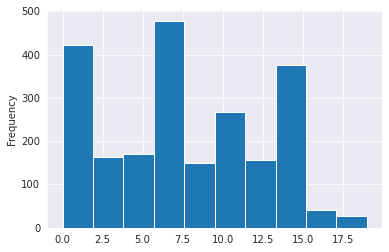

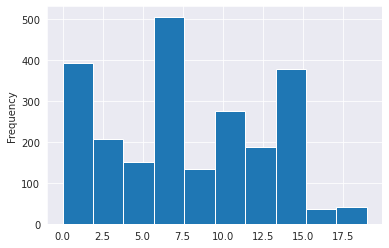

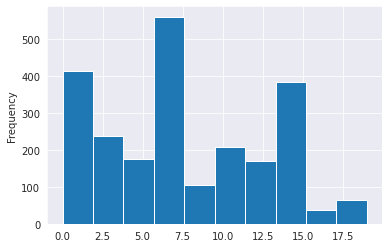

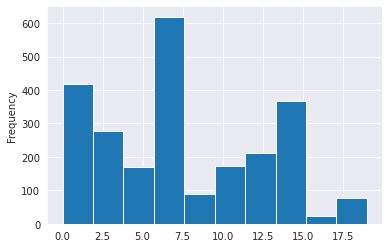

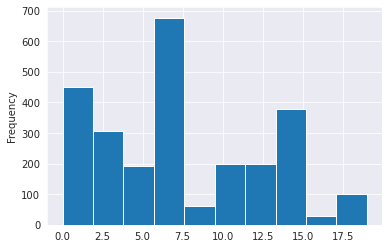

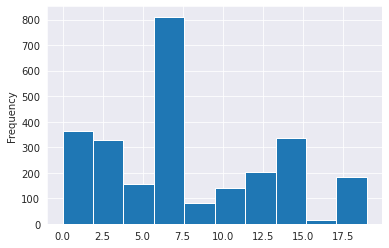

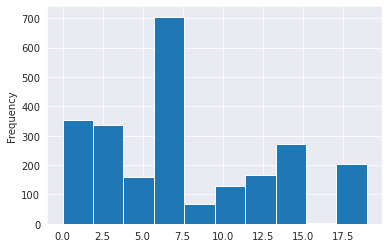

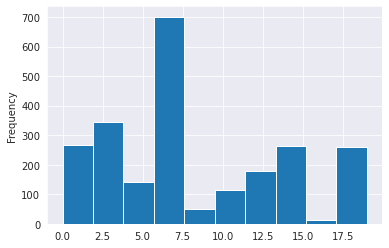

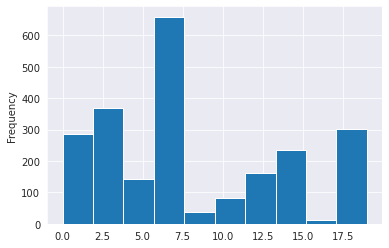

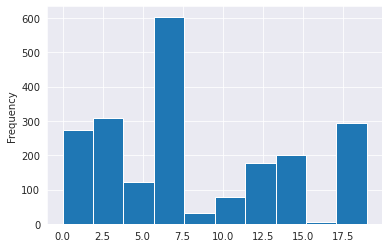

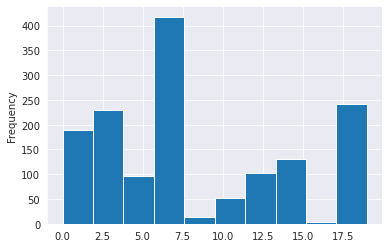

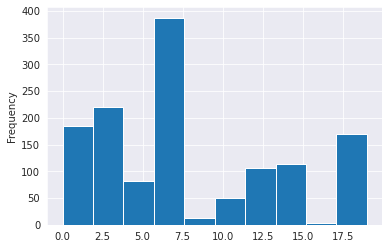

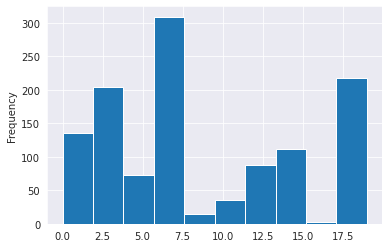

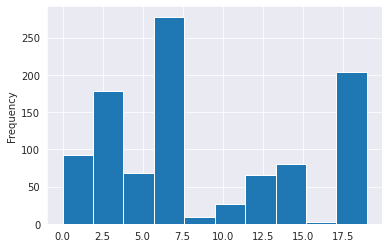

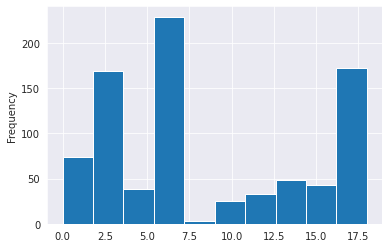

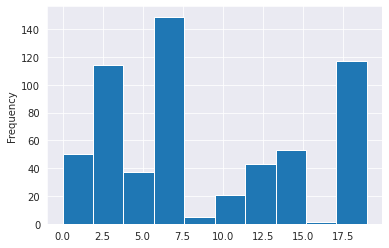

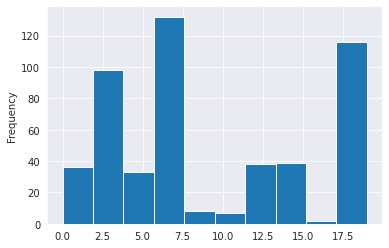

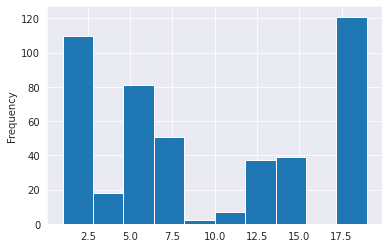

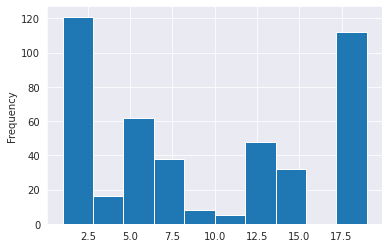

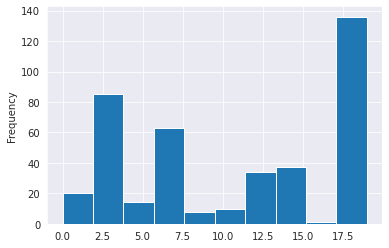

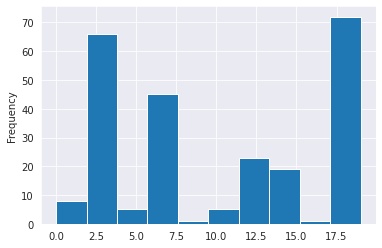

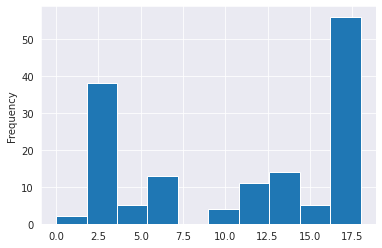

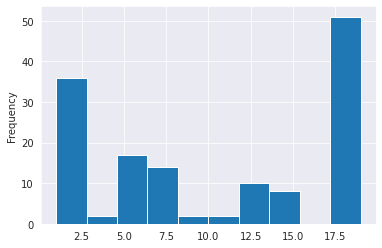

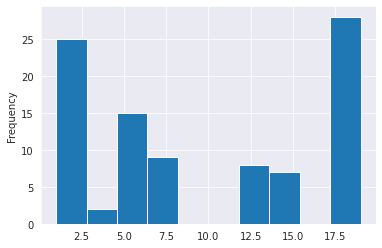

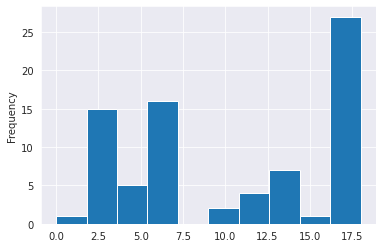

In [110]:
for i in range(30):
    clean_df["cluster"][clean_df["sub_grade"] == i].plot(kind = "hist")
    plt.show()

<AxesSubplot:ylabel='Frequency'>

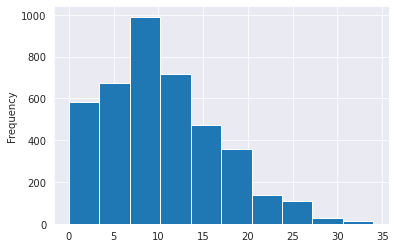

In [30]:
clean_df["sub_grade"].plot(kind = "hist")